# Working with Data Files in R

## Exercises

For these exercises, we will be using the **pain** data.

1. Find summary statistics for `PROMIS_PHYSICAL_FUNTION` and `PROMIS_ANXIETY` variables and observe the distribution of those patient-reported pain experiences. What striking feature do you notice in the summary? 

In [1]:
## solutions:
library(RforHDSdata)
data(pain)

summary(pain$PROMIS_PHYSICAL_FUNCTION)
summary(pain$PROMIS_ANXIETY)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.40   30.60   35.39   35.27   39.37   73.33       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  32.87   49.27   56.49   56.28   63.35   84.90      88 

2. Create frequency tables about `PAT_SEX` and `PAT_RACE` and tell more information about distributions of demographic characteristics.


In [2]:
table(pain$PAT_SEX)
table(pain$PAT_RACE)


female   male 
 13102   8556 


         ALASKA NATIVE        AMERICAN INDIAN                  BLACK 
                     2                     58                   3229 
               CHINESE               DECLINED               FILIPINO 
                    21                    121                      6 
         GUAM/CHAMORRO               HAWAIIAN         INDIAN (ASIAN) 
                     1                      1                     49 
              JAPANESE                 KOREAN          NOT SPECIFIED 
                     9                     10                      4 
                 OTHER            OTHER ASIAN OTHER PACIFIC ISLANDER 
                     1                     47                     12 
            VIETNAMESE                  WHITE 
                     6                  17940 

3. Create a data frame to describe the total number of patients reported pain for each of bodily pain regions. Then, create another data frame for summary statistics.

In [3]:
colsum <- as.data.frame(colSums(pain[,c(2:75)], na.rm = TRUE))
colsum$colSumValue <- colsum$`colSums(pain[, c(2:75)], na.rm = TRUE)`

colsum_summary <- data.frame(Variable = c("Sum of Columns"),
                             Min =  min(colsum$colSumValue),
                             Median = median(colsum$colSumValue),
                             Mean  = mean(colsum$colSumValue),
                             Max = max(colsum$colSumValue),
                             SD = sd(colsum$colSumValue),
                             Var = var(colsum$colSumValue))

4. Calculate the median and interquartile range of the distribution of the total number of painful regions selected for each patient. Write a sentence to explain any interesting observations in the context of this dataset. 

In [4]:
rowsum <- as.data.frame(rowSums(pain[,2:75], na.rm = TRUE))
rowsum$RowSumValue <- rowsum$`rowSums(pain[, 2:75], na.rm = TRUE)`

median(rowsum$RowSumValue)
IQR(rowsum$RowSumValue)

[1] 7

[1] 9

5. Assume a reasonable number of painful regions for patients to be 15 and use a `subset()` command to create a trimmed version of the pain dataset called **pain.subset** that only contains data for patients with the total number of painful regions less than 15.

In [5]:
pain$rowsum <- rowsum$RowSumValue
pain.subset <- subset(pain, rowsum <=15)

6. Find the distribution of `PAIN_INTENSITY_AVERAGE.follow_up`. And create a column of missing data at this follow up variable.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   5.000   6.000   5.988   8.000  10.000   14521 

[1] 11749

[1] TRUE

ERROR: Error in if_else(is.na(pain$PAIN_INTENSITY_AVERAGE.follow_up) == TRUE, : could not find function "if_else"


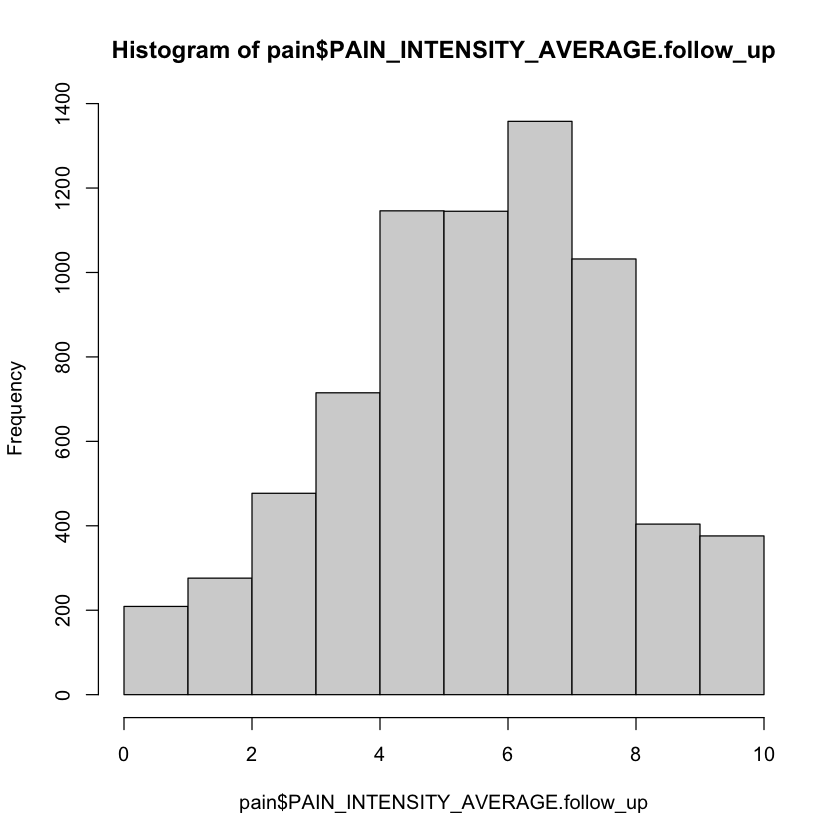

In [6]:
summary(pain$PAIN_INTENSITY_AVERAGE.follow_up)
hist(pain$PAIN_INTENSITY_AVERAGE.follow_up)

which(is.na(pain$PAIN_INTENSITY_AVERAGE)==TRUE)
is.na(pain$PAIN_INTENSITY_AVERAGE.follow_up[11749])
pain$missing_follow_up <- if_else(is.na(pain$PAIN_INTENSITY_AVERAGE.follow_up)==TRUE,1,0)